In [ ]:
!unzip '/content/drive/MyDrive/ML Datasets/archive.zip'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
#Load train and test set
train_dir = '/content/train'
test_dir = '/content/test'
val_dir = '/content/test'

In [5]:
# Data augmentation

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Building VGG19 transfer learning model.

In [6]:
res50 = ResNet50(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in res50.layers:
    layer.trainable = False

model = Sequential()
model.add(res50)
model.add(Flatten())
model.add(Dense(7, activation="softmax"))
model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 7)                 229383    
                                                                 
Total params: 23817095 (90.86 MB)
Trainable params: 229383 (896.03 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [7]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [8]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,
                              validation_steps=len(val_generator)//32)

<ipython-input-8-71cc3d49c955>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/20
28/28 [==============================] - 14s 236ms/step - loss: 2.0386 - accuracy: 0.1908 - val_loss: 1.8686 - val_accuracy: 0.1920
Epoch 2/20
28/28 [==============================] - 7s 238ms/step - loss: 1.8445 - accuracy: 0.2232 - val_loss: 1.8191 - val_accuracy: 0.2143
Epoch 3/20
28/28 [==============================] - 6s 211ms/step - loss: 1.8514 - accuracy: 0.2199 - val_loss: 1.9538 - val_accuracy: 0.1339
Epoch 4/20
28/28 [==============================] - 8s 288ms/step - loss: 1.8242 - accuracy: 0.2489 - val_loss: 1.8167 - val_accuracy: 0.2902
Epoch 5/20
28/28 [==============================] - 6s 212ms/step - loss: 1.8603 - accuracy: 0.2411 - val_loss: 1.8661 - val_accuracy: 0.2054
Epoch 6/20
28/28 [==============================] - 7s 238ms/step - loss: 1.7863 - accuracy: 0.2545 - val_loss: 1.8793 - val_accuracy: 0.1473
Epoch 7/20
28/28 [==============================] - 9s 291ms/step - loss: 1.8385 - accuracy: 0.2355 - val_loss: 1.8945 - val_accuracy: 0.1920
Epoch

In [9]:
model.evaluate_generator(test_generator)

<ipython-input-9-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[1.7647684812545776, 0.2882418632507324]

In [10]:
# Save the model
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/model.h5")

h =  history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

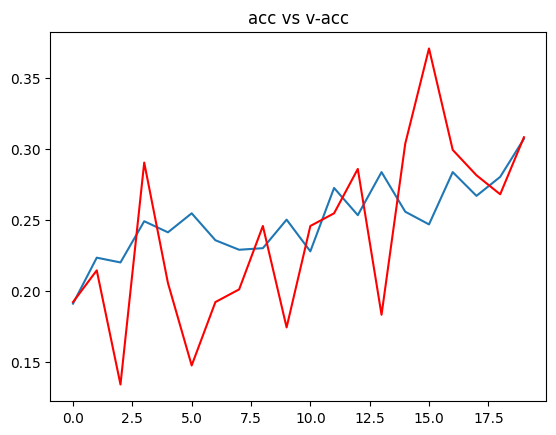

In [12]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

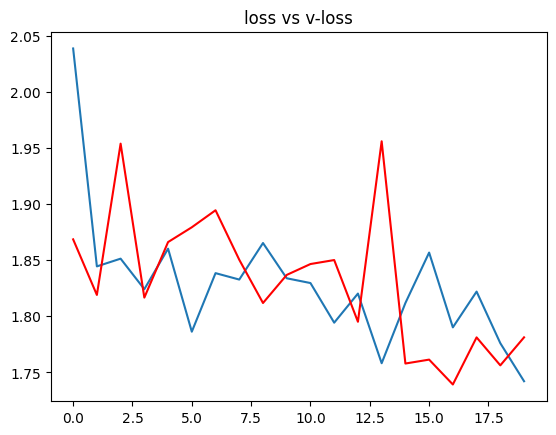

In [13]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [14]:
# just to map o/p values
op = dict(zip( train_generator.class_indices.values(), train_generator.class_indices.keys()))

1/1 [==============================] - 2s 2s/step
 the image is of happy


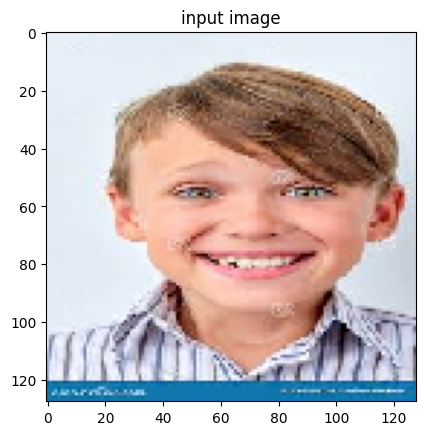

In [16]:
# path for the image to see if it predics correct class

path = "/content/download.jpg"
img = load_img(path, target_size=(128, 128) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()